# Silvia Deana - Challenge $0$ 


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sklearn as sklearn
from sklearn.model_selection import train_test_split

Obtain the data file

In [48]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !curl "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"
else:
    print("Either the file is missing or not readable, download it")
    !curl "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"

File already exists
File is readable


In [49]:
#import pandas as pd

# Load the dataset using Pandas
data = pd.read_csv('50_Startups.csv')

# Extracting the features (independent variables) and labels (dependent variable)
# Features (X) are taken from all columns except the last two
features = data.iloc[:, :-2].values

# Labels (y) are taken from the third column (index 3, considering the 0-based index in Python)
labels = data.iloc[:, 3].values

df = pd.DataFrame(data)

In [50]:
labels # Stati dove si trovano le stratup

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

***Play with data***

In [51]:
df.shape

(50, 5)

In [52]:
df.replace(to_replace = 0.00, value = df.mean(axis=0, numeric_only=True), inplace=True)  # inject the mean of the column when value is 0
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


 **`df.replace()` function:**
   - This function is used to replace specific values within a DataFrame (`df`) with another value.
   - The parameters used are:
     - `to_replace=0.00`: This specifies the value in the DataFrame that needs to be replaced, in this case, `0.00`.
     - `value=df.mean(axis=0)`: This sets the replacement value for the matched condition. Here, `df.mean(axis=0)` calculates the mean for each column along the rows (axis=0) of the DataFrame `df`. The mean value for each column will replace the `0.00` values.
     - `inplace=True`: This parameter ensures that the modification is done directly on the original DataFrame (`df`) without creating a new DataFrame. If `inplace` is set to `True`, the original DataFrame is modified.

***Select two categories for binary classification***

In [53]:
df_sel=df[(df.State=="California") | (df.State=="Florida")] # prendiamo solo california e florida

In [54]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [55]:
df_sel.dtypes # type of each column

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***Encode categorical data***

One-hot encoding of categorical feature _State_

One-Hot Encoding is a technique used in machine learning to handle categorical variables by transforming them into a format that can be easily utilized by algorithms.

Imagine having a categorical variable, such as colors: red, green, and blue. With One-Hot Encoding, each color becomes a new binary column. If an observation has a specific color, the column corresponding to that color will be set to 1, while the other columns will be set to 0.

For example:
- If you have categories "red", "green", "blue", and you want to encode them using One-Hot Encoding:
  - "red" becomes [1, 0, 0]
  - "green" becomes [0, 1, 0]
  - "blue" becomes [0, 0, 1]

This helps machine learning algorithms to understand and work with these categorical variables more effectively, as it doesn't impose an order or hierarchy among the categories but rather represents them in a form that the algorithm can interpret more efficiently.

In [56]:
df_one = pd.get_dummies(df_sel["State"], dtype=int) # rapp binaria dello Stato 
# 1 per california 
# 0 per florida

In [57]:
df_one.head()

,California,Florida
1,1,0
2,0,1
4,0,1
6,1,0
7,0,1


In [58]:
# construct the final dataset that you will use for learning and prediction
df_fin = pd.concat((df_one, df_sel), axis=1) # concatena 
df_fin = df_fin.drop(["Florida"], axis=1) # drop = rimuove la colonna 
df_fin = df_fin.drop(["State"], axis=1)
# California is class 1, Florida is class 0
df_fin = df_fin.rename(columns={"California": "State"})
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [59]:
# funzione che normalizza 
def absolute_maximum_scale(series):
    """
    Scale each column in the DataFrame 'df_fin' by dividing the values by the absolute maximum value of that column.
    Args: 
    series: A pandas Series or DataFrame column to be scaled.

    Returns:
    A scaled version of the input series with values ranging from -1 to 1 based on the maximum absolute value in the column.
    """
    return series / series.abs().max()

for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [60]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1.0,1.000000,0.828805,1.000000,1.000000
2,0.0,0.943688,0.553781,0.918982,0.996133
4,0.0,0.873981,0.500378,0.824892,0.866501
6,1.0,0.827905,0.805926,0.287716,0.814020
7,0.0,0.801353,0.796789,0.729619,0.812091


In [61]:
df_fin.shape

(33, 5)

***Classification***

Prepare the dataset:

In [62]:
y = df_fin["State"] # ground truth labels, prima colonna del dataframe
X = df_fin.drop(["State"], axis=1) # datapoints features, le altre colonne 
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [63]:
# Splitting the dataset into training and testing sets
# X represents the features (independent variables), and y represents the target (dependent variable).

# Using train_test_split function to create the training and testing sets
# X_train and y_train: Training features and labels
# X_test and y_test: Testing features and labels

# The 'test_size=0.25' parameter sets the proportion of the dataset to include in the test split. Here, 25% of the data is allocated to the test set.
# The 'random_state=0' parameter sets the random seed for reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


Facciamo un grafico per vedere come sono distribuiti i dati del train

C:\Users\silvi\AppData\Local\Temp\ipykernel_12720\898006853.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


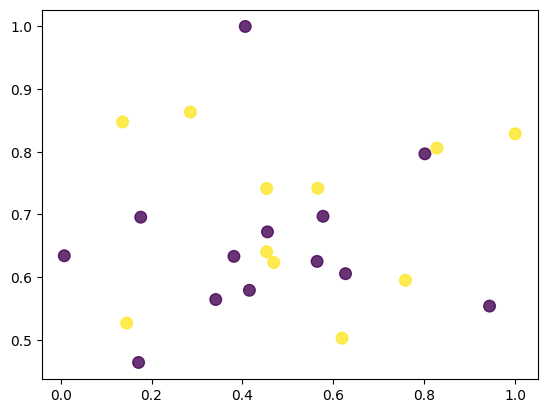

In [64]:
#grafico della distruzione dei nostri dati
fig, ax = plt.subplots()
ax.scatter(X_train[:,0], X_train[:,1], s=70, c=y_train, alpha=0.8)
fig.show()

In [65]:
print("numero dati del train: ", X_train.shape)

numero dati del train:  (24, 4)


Per prima cosa notiamo che sono , come stampato la X_train è una matrice di solo 24 righe (dato) per 4 colonne (feature)

Train the Logistic Regression Model

In [66]:
# importiamo il modello per fare la regressione logistica 
from sklearn.linear_model import LogisticRegression

Iniziamo con una prima regressione logisica senza regolarizzazione

In [67]:
# Creating a Logistic Regression model with specific parameters
# - 'penality = None' non imponiamo nessuna regolarizzazione al modello 
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='saga' selects the optimization algorithm for the logistic regression così da poter selezionare la penalità che desideriamo 

LR = LogisticRegression(penalty= None, random_state=0, solver='saga').fit(X_train, y_train)
# metodo di classificazione binaria senza regolarizzazione

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
y_pred = LR.predict(X_test) #y_pred è senza regolarizzazione 

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy = round(LR.score(X_test, y_test), 4)
print("accuracy: ", accuracy)


accuracy:  0.3333


c:\Users\silvi\.vscode\ml\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Notiamo che un'accuracy del 30% è un valore basso. Potrebbe essere causato sia dalla dimensione piccola del nostro data set che dalla mancanza di regolarizzazione

***Plot results***

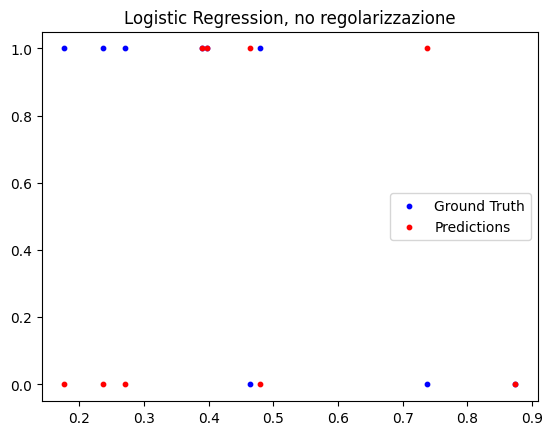

In [68]:
plt.scatter(X_test[:,0], y_test, color='blue', label='Ground Truth', s=10) # X_test[:,0] prendiamo solo la prima colonna
plt.scatter(X_test[:,0], y_pred, color='red', label='Predictions', s=10)
plt.legend() # scelte stilistiche, cosa stiamo plottando e cosa vogliamo ottenere 
plt.title("Logistic Regression, no regolarizzazione")
plt.show()

Dal grafico sopra si vedere che la divisione tra le due classi non è ben definita, in accordo con il basso valore di accuracy

***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course).

Regolarizzazioni viste a lezione: 
1. Ridge, norma 2 
2. Lasso, norma 1
3. Elastic Net, norma 2 + norma 1

L'idea alla base della regolarizzazione è di controllare la complessità del problema, attraverso un iperparametro aggiuntivo da inserire nella Loss, il quale valore viene fissato durante la validazione 

1. Ridge

In [69]:
# penality = l2, impone la regolarizzazione seconda norma 2, ovvero la Ridge
LR_ridge = LogisticRegression(penalty='l2',random_state=0, solver='saga').fit(X_train, y_train)
# metodo di classificazione binaria 

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
y_pred_ridge = LR_ridge.predict(X_test) #y_pred è senza regolarizzazione 

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy_ridge = round(LR_ridge.score(X_test, y_test), 4)
print("accuracy with Ridge Reg: ", accuracy_ridge)

accuracy with Ridge Reg:  0.3333


Anche in questo caso l'accuracy è solo del 30%

Facciamo un plot dei risultati

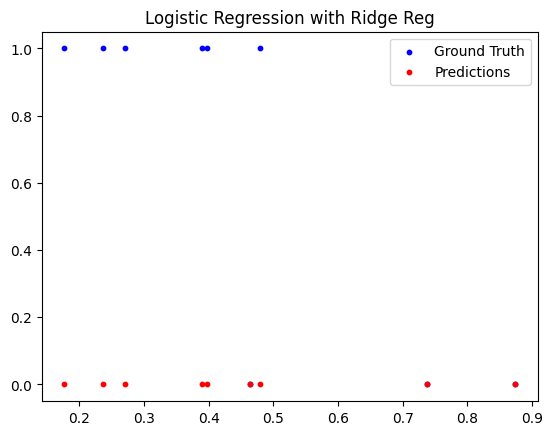

In [70]:
plt.scatter(X_test[:,0], y_test, color='blue', label='Ground Truth', s=10) # X_test[:,0] prendiamo solo la prima colonna
plt.scatter(X_test[:,0], y_pred_ridge, color='red', label='Predictions', s=10)
plt.legend() # scelte stilistiche, cosa stiamo plottando e cosa vogliamo ottenere 
plt.title("Logistic Regression with Ridge Reg")
plt.show()

2. Lasso 

In [71]:
# penality = l1, impone la regolarizzazione seconda norma 1, ovvero la Lasso
LR_lasso = LogisticRegression(penalty= 'l1' ,random_state=0, solver='saga').fit(X_train, y_train)
# metodo di classificazione binaria 

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
y_pred_lasso = LR_lasso.predict(X_test) #y_pred è senza regolarizzazione 

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy_lasso = round(LR_lasso.score(X_test, y_test), 4)
print("accuracy with Lasso Reg: ", accuracy_lasso)

accuracy with Lasso Reg:  0.3333


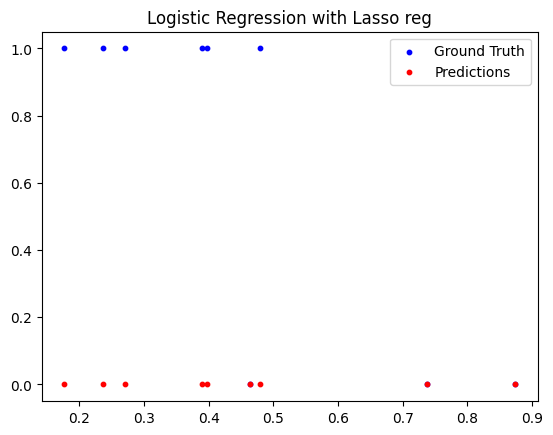

In [72]:
plt.scatter(X_test[:,0], y_test, color='blue', label='Ground Truth', s=10) 
plt.scatter(X_test[:,0], y_pred_lasso, color='red', label='Predictions', s=10)
plt.legend() # scelte stilistiche, cosa stiamo plottando e cosa vogliamo ottenere 
plt.title("Logistic Regression with Lasso reg")
plt.show()

3. Elastic Net

In [73]:
# penality = elsaticnet, impone la regolarizzazione seconda norma 1 + norma 2, ovvero Elastic Net
LR_EN = LogisticRegression(penalty='elasticnet',random_state=0, solver='saga', l1_ratio= 0.5).fit(X_train, y_train)
# metodo di classificazione binaria 

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
y_pred_EN = LR_EN.predict(X_test) #y_pred è senza regolarizzazione 

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy_EN = round(LR_EN.score(X_test, y_test), 4)
print("accuracy with ElasticNet Reg: ", accuracy_EN)

accuracy with ElasticNet Reg:  0.3333


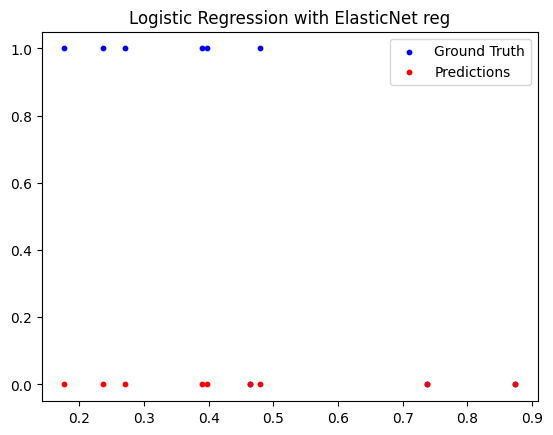

In [74]:
plt.scatter(X_test[:,0], y_test, color='blue', label='Ground Truth', s=10) # X_test[:,0] prendiamo solo la prima colonna
plt.scatter(X_test[:,0], y_pred_EN, color='red', label='Predictions', s=10)
plt.legend() # scelte stilistiche, cosa stiamo plottando e cosa vogliamo ottenere 
plt.title("Logistic Regression with ElasticNet reg")
plt.show()

***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions.

In [75]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test) # senza regolarizzazione

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.20      0.33      0.25         3
     Florida       0.50      0.33      0.40         6

    accuracy                           0.33         9
   macro avg       0.35      0.33      0.33         9
weighted avg       0.40      0.33      0.35         9



Repeat the previous task for regularized logistic regression and compare the results.

1. ridge

In [76]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred_ridge = LR_ridge.predict(X_test) # senza regolarizzazione

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred_ridge, target_names=target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



c:\Users\silvi\.vscode\ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\silvi\.vscode\ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\silvi\.vscode\ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2. Lasso

In [77]:
y_pred_lasso = LR_lasso.predict(X_test) # senza regolarizzazione

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred_lasso, target_names=target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



c:\Users\silvi\.vscode\ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\silvi\.vscode\ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\silvi\.vscode\ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3. Elastic Net

In [78]:
y_pred_EN = LR_EN.predict(X_test) # senza regolarizzazione

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred_EN, target_names=target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



c:\Users\silvi\.vscode\ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\silvi\.vscode\ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\silvi\.vscode\ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score

In [80]:
def plot_roc_curve(y_true, y_pred):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate') 

model 1 AUC score: 0.33333333333333337


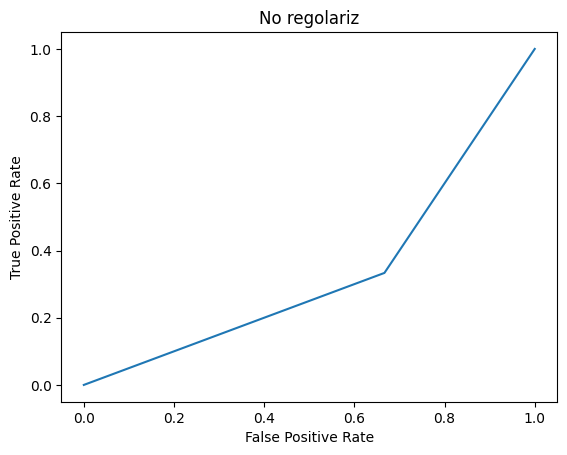

In [81]:
plot_roc_curve(y_true, y_pred) # no regolarizzazione
plt.title("No regolariz")
print(f'model 1 AUC score: {roc_auc_score(y_true, y_pred)}') 

Vediamo che fa peggio del BaseLine Model

model 1 AUC score: 0.5


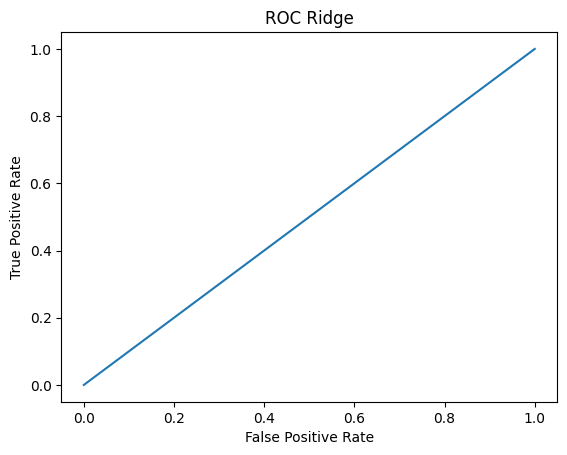

In [82]:
plot_roc_curve(y_true, y_pred_ridge)
plt.title("ROC Ridge")
print(f'model 1 AUC score: {roc_auc_score(y_true, y_pred_ridge)}') 


model 1 AUC score: 0.5


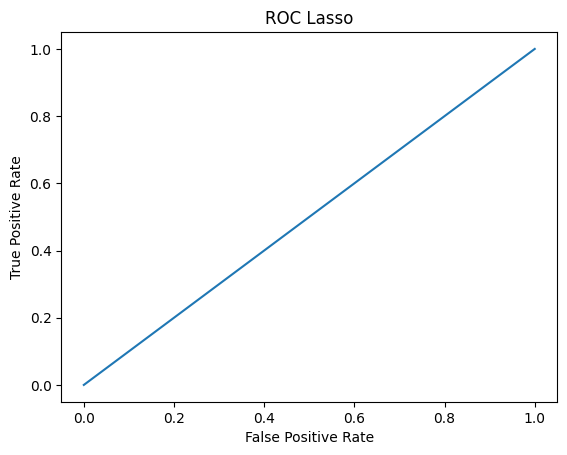

In [83]:
plot_roc_curve(y_true, y_pred_lasso)
plt.title("ROC Lasso")
print(f'model 1 AUC score: {roc_auc_score(y_true, y_pred_lasso)}') 

model 1 AUC score: 0.5


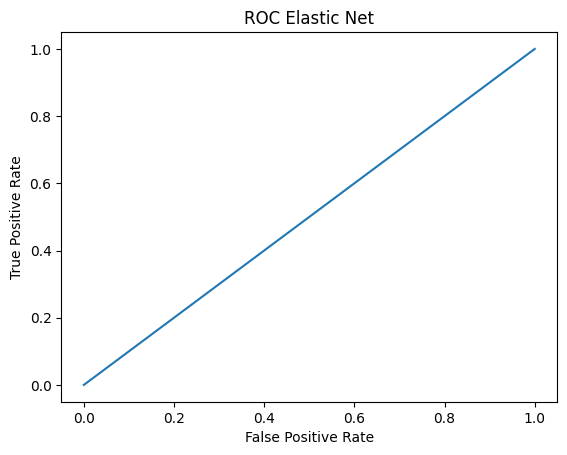

In [84]:
plot_roc_curve(y_true, y_pred_EN)
plt.title("ROC Elastic Net")
print(f'model 1 AUC score: {roc_auc_score(y_true, y_pred_EN)}') 

In conformità con i risultati trovati sopra, i plot delle rispettive ROC mostrano che le performances dei modelli sono ben che meno che ottimali. Infatti sono pari, se non peggio nel primo caso, al baseline model